In [1]:
import numpy as np
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
from itertools import chain
from mpl_toolkits.basemap import Basemap
import os


In [2]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')


In [3]:
minlat = 60
maxlat = 87.5
minlon = -180
maxlon = 180

In [7]:
fb1_file_snow_mat = np.loadtxt(f"../images/means/201504_CS2fb_1.5lon_x_0.5lat.txt_snow")
fb1_file_ice_mat = np.loadtxt(f"../images/means/201504_CS2fb_1.5lon_x_0.5lat.txt_ice")
fb2_file_snow_mat  = np.loadtxt(f"../images/means/201504_AKfb_1.5lon_x_0.5lat.txt_snow")
fb2_file_ice_mat  = np.loadtxt(f"../images/means/201504_AKfb_1.5lon_x_0.5lat.txt_ice")


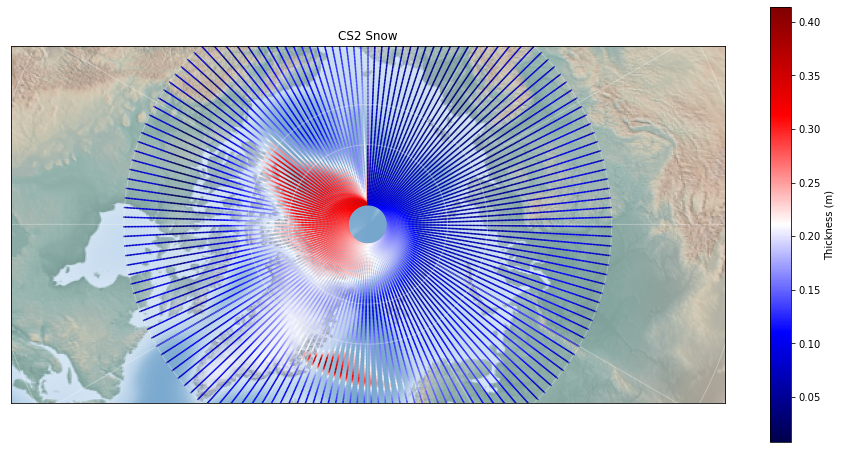

Text(0.5, 1.0, 'CS2 Ice')

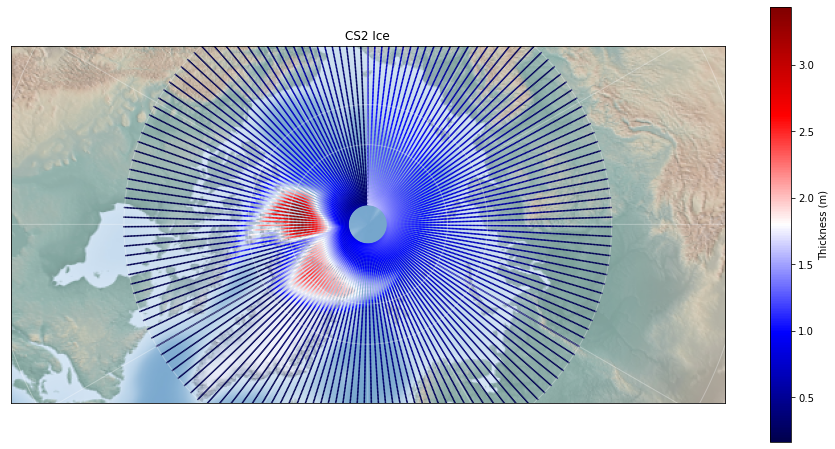

In [10]:
lon = np.linspace(minlon, maxlon, 160)
lat = np.linspace(minlat, maxlat, 160)
lon_g, lat_g = np.meshgrid(lon, lat)

extent = [minlon, maxlon, minlat, maxlat]


plt.figure(figsize=(16, 8))
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=1E7, height=0.5E7)
draw_map(m)

m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=fb1_file_snow_mat, cmap="seismic")
plt.colorbar(label=r'Thickness (m)')
plt.title("CS2 Snow")

plt.show()

plt.figure(figsize=(16, 8))
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=1E7, height=0.5E7)
draw_map(m)

m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=fb1_file_ice_mat, cmap="seismic")
plt.colorbar(label=r'Thickness (m)')
plt.title("CS2 Ice")


In [12]:
np.load("../data/CPOM/freeboard_daily_processed/AK_CPOM/dailyFB_50km_2014-2015_season.pkl", allow_pickle=True)

{'20141001': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 '20141002': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 '20141003': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 '20141004': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
       